### Non zero Field analysis

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [117]:
def read_data(file: str):
    return np.loadtxt(file, skiprows=1, unpack = True)

In [109]:
def find_critical_current(current, voltage):
    diff = 1
    for index in range(len(current) -2, -1, -1):
        new_diff = np.abs((voltage[index+1] - voltage[index]))
        # print(new_diff, voltage[index])
        if new_diff > 30*diff:
            return index
        else:
            new_diff = diff   

In [145]:
DATA_DIR = "/home/varunseshadri/courses/fopra/GGS_16/GGS/"
datafiles = sorted(os.listdir(DATA_DIR))

In [108]:
filepath = "/home/varunseshadri/courses/fopra/GGS_16/GGS/FieldVarV006"
# no 10, no 6 look good

In [106]:
v, c = np.loadtxt(filepath, skiprows =1, unpack = True)
find_critical_current(c, v)

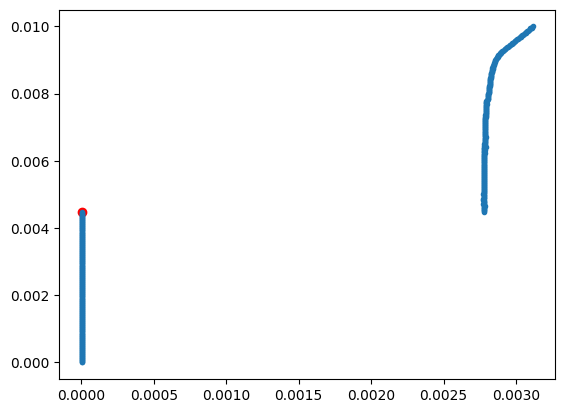

In [112]:
plt.plot(v, c, ".")
plt.scatter(v[find_critical_current(c*1e6, v*1e6)], c[find_critical_current(c*1e6, v*1e6)], color='red')

In [148]:
critical_currents = list()
corres_volts = list()
for file in datafiles:
    if file.startswith("Field") and file.count('_') ==0:
        corres_volts.append(int(file[-3:]))
        v,c = read_data(DATA_DIR+file)
        critical_current = c[find_critical_current(c*1e6, v*1e6)]
        critical_currents.append(critical_current)

In [241]:
new_x = np.linspace(corres_volts[0], corres_volts[-1], num = len(corres_volts)*5)

In [182]:
from scipy.optimize import curve_fit

In [325]:
def func(x,b,c,a, d):
    return b*np.sinc((x-c)/(np.pi)*a) + d

In [326]:
popt, pcov = curve_fit(func, corres_volts,critical_currents)

In [327]:
popt

array([4.69822532e-03, 2.72717341e+00, 5.90353138e-01, 1.41134917e-03])

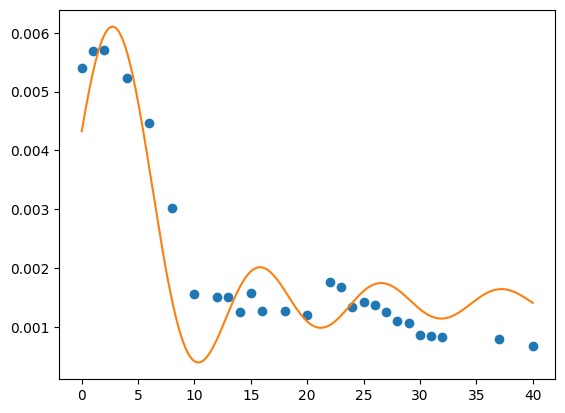

In [235]:
plt.plot(corres_volts,critical_currents,'o')
plt.plot(new_x, func(new_x, *popt))
# plt.plot(new_x, sinc(new_x))

### Zero Field Analysis

In [154]:
no_v, no_c = read_data(DATA_DIR+"NoFieldDense")

In [280]:
i_r_index = np.argmax(np.diff(no_v[:np.argmax(no_c)])) +1

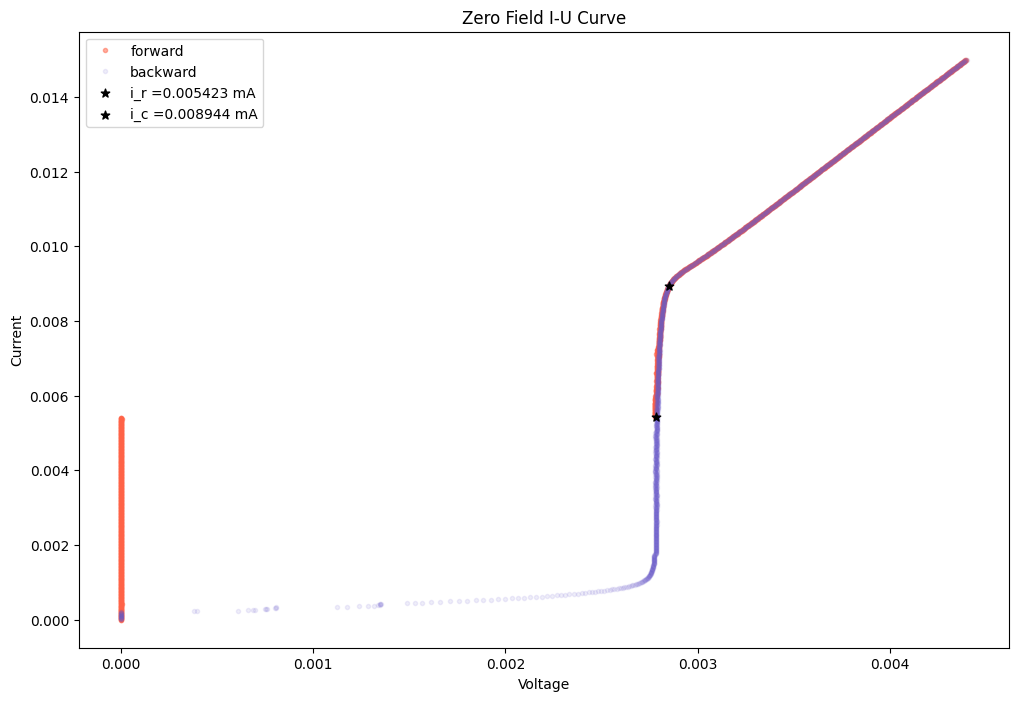

In [319]:
plt.figure(figsize = (12,8))
plt.title("Zero Field I-U Curve")
plt.xlabel("Voltage")
plt.ylabel("Current")
plt.plot(no_v[:np.argmax(no_v)], no_c[:np.argmax(no_c)], '.', color="tomato", label="forward", alpha = 0.5, zorder=0)
# plt.plot(no_v[:np.argmax(no_v)], no_c[:np.argmax(no_c)], 'rx')
plt.plot(no_v[np.argmax(no_v):], no_c[np.argmax(no_c):], '.',color = "slateblue", alpha = 0.1, label= "backward", zorder=5)
plt.scatter(x=no_v[i_r_index] , y=no_c[i_r_index],marker= "*", s=40, color = "black" , zorder=10, label = f"i_r ={no_c[i_r_index]} mA" )
plt.scatter(x=no_v[np.where(test >= 0.00285)[0][0]] , y=no_c[np.where(test >= 0.00285)[0][0]],marker= "*", s=40, color = "black" , zorder=10, label = f"i_c ={no_c[np.where(test >= 0.00285)[0][0]]} mA" )

# plt.scatter([no_v[10]] , [no_c[10]], "_")

# plt.plot(no_v[np.argmax(no_v):], no_c[np.argmax(no_c):], 'b.')
plt.legend()

In [322]:
beta_c = (no_c[np.where(test >= 0.00285)[0][0]]/no_c[i_r_index])**2
beta_c = beta_c * (4/np.pi)**2
print(F"THe Mc-Cumber Parameter is {beta_c}")

THe Mc-Cumber Parameter is 4.409654967115483


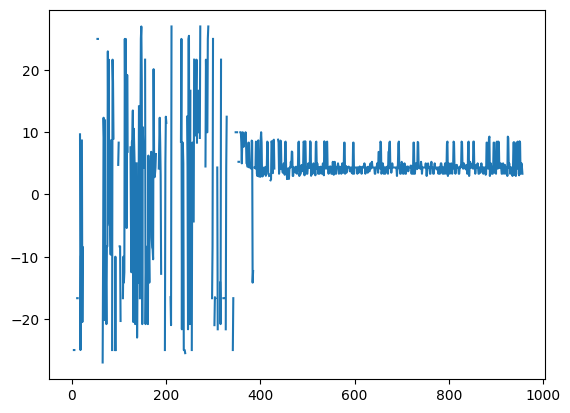

In [306]:
plt.plot(np.arange(len(no_c[i_r_index:np.argmax(no_c)])), np.gradient(no_c[i_r_index:np.argmax(no_c)], no_v[i_r_index:np.argmax(no_c)]))